In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.optimize import newton

In [3]:
# Initialize model parameters (mean and variance) according to explanation above; also parameters of distribution we're trying to match
m0 = 0
s0 = 1
a = 10
mt = a
st = 1
gamma = 0.05 # -> This is just the "step size" in the proximal step
d = 5000 # how many particles we have at each step

# Initializing arrays that will keep updates of means and variances
n = 100
particles = []
old_particles = np.random.normal(m0,s0,d)
particles.append(old_particles)

# Set iterative updates
# x_old = np.ones(d)
# f = lambda x: x - (gamma/(1+gamma))*np.tanh(x)*a - ((1-gamma)/(1+gamma))*x_old-(gamma/(1+gamma))*np.tanh(a*x_old)*a - np.sqrt(4*gamma)/(1+gamma)*z
for i in range(1,n+1):
    tmp_particles = np.zeros(d)
    for j in range(0,d):
        # Update particles
        x_old = old_particles[j]
        z = np.random.normal(0,1,1)
        f = lambda x: x - (gamma/(1+gamma))*np.tanh(x)*a - ((1-gamma)/(1+gamma))*x_old-(gamma/(1+gamma))*np.tanh(a*x_old)*a - np.sqrt(4*gamma)/(1+gamma)*z
        tmp_particles[j] = newton(f, x0=x_old)
    particles.append(tmp_particles)
    old_particles = tmp_particles    

In [5]:
normal = lambda x,m,s: (1/(np.sqrt(2*np.pi*s**2)))*(np.exp(-0.5*(x-m)**2/(s**2)))

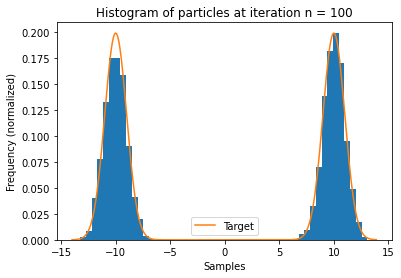

In [6]:
xs = np.arange(np.floor(np.min(particles[-1])),np.ceil(np.max(particles[-1])),step=0.1)
plt.hist(particles[-1],bins=50,density=True)
# normies = [normal(x,ms[0],ss[0]) for x in xs]
normies_tgt = [0.5*normal(x,-a,1)+0.5*normal(x,a,1) for x in xs]
# plt.plot(xs,normies,label="$\mu_n$")
plt.plot(xs,normies_tgt,label="Target")
plt.title("Histogram of particles at iteration n = " + str(100))
plt.ylabel("Frequency (normalized)")
plt.xlabel("Samples")
plt.legend()

In [7]:
for i in range(n):
    plt.figure()
    xs = np.arange(np.minimum(np.ceil(np.min(particles[i])),-15),np.maximum(np.ceil(np.max(particles[i])),15),step=0.1)
    plt.hist(particles[i],bins=50,density=True)
    normies_tgt = [0.5*normal(x,-a,1)+0.5*normal(x,a,1) for x in xs]
    plt.plot(xs,normies_tgt,label="Target")
    plt.title("Histogram of particles at iteration n = " + str(i))
    plt.ylabel("Frequency (normalized)")
    plt.xlabel("Samples")
    plt.legend()
    plt.savefig("MixedG/iter_" + str(i+1) + ".png")
    plt.close()

In [8]:
import glob
files = glob.glob(r"MixedG/*.png")

In [9]:
# Define a custom key function to extract the iteration number from each filename
def get_iteration_number(filename):
    return int(filename.split('_')[-1].split('.')[0])

# Sort the list of filenames using the custom key function
sorted_filenames = sorted(files, key=get_iteration_number)

In [10]:
from PIL import Image

In [11]:
# Create a list to store PIL Image objects
image_array = []

# Load each image and append it to the list
for filename in sorted_filenames:
    image = Image.open(filename)
    image_array.append(image)

# Specify the output GIF filename
output_gif_filename = "MixedG/output.gif"

# Save the list of images as a GIF
image_array[0].save(
    output_gif_filename,
    save_all=True,
    append_images=image_array[1:],
    duration=200,  # Set the duration for each frame in milliseconds
    loop=0,  # Set loop to 0 for infinite loop, or any other integer for a finite loop
)

In [15]:
image_array = []
for my_file in sorted_filenames:
    
    image = Image.open(my_file)
    image_array.append(image)

print('image_arrays shape:', np.array(image_array).shape)

<ipython-input-15-54ab9c92397c>:7: FutureWarning: The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  print('image_arrays shape:', np.array(image_array).shape)


image_arrays shape: (100,)


<ipython-input-15-54ab9c92397c>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print('image_arrays shape:', np.array(image_array).shape)


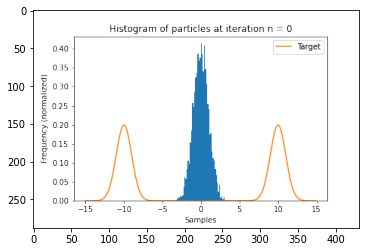

In [16]:
import matplotlib.animation as animation

# Create the figure and axes objects
fig, ax = plt.subplots()

# Set the initial image
im = ax.imshow(image_array[0], animated=True)

In [17]:
def update(i):
    im.set_array(image_array[i])
    return im, 

In [18]:
# Create the animation object
animation_fig = animation.FuncAnimation(fig, update, frames=len(image_array), interval=200, blit=True,repeat_delay=10,)

# Show the animation
plt.show()

animation_fig.save("MixedG/animated_GMM.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


# Notes

Can't keep track of moments and variance hence can't compute W dist